<a href="https://colab.research.google.com/github/ruchawaghulde/Facial-Keypoints-Detection/blob/master/Code/FacialKeyPointsDetection_GoogleCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FACIAL KEYPOINTS DETECTION

**Building a Client for  Kaggle API**

1. Downloading and Importing the Kaggle Json containing the Username and key for the kaggle account

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle.json': b'{"username":"luisoc","key":"1fffc9cce9a1523a13aa6812c1064b25"}'}

2. Checking if the Json File is present

In [0]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 62 Dec  1 17:21 kaggle.json


3. Crearting a Client to host the Kaggle API

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

4. Improting the dataet using Kaggle API provided for the Facial Keypoint Detection

In [0]:
!kaggle competitions download -c facial-keypoints-detection

training.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
SampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
IdLookupTable.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!ls

'AbccEAc (1).jpg'			   'kaggle (4).json'
'AbccEAc (2).jpg'			   'kaggle (5).json'
 AbccEAc.jpg				    kaggle.json
'haarcascade_frontalface_default (1).xml'   original.jpg
'haarcascade_frontalface_default (2).xml'  'P1030450 (1).JPG'
'haarcascade_frontalface_default (3).xml'   P1030450.JPG
 haarcascade_frontalface_default.xml	    sample_data
 IdLookupTable.csv			    SampleSubmission.csv
'kaggle (1).json'			    test.zip
'kaggle (2).json'			    training.zip
'kaggle (3).json'


### PART 1 - Preprocessing and evaluation of the Dataset

#### EDA and Feature Engineering
This is the data analaysis of our dataset whilist removing the missing values and how our input values will look like.

**Importing the libraraies**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import math
import os
import seaborn as sns

**Importing the Data Frames using Pandas**

In [0]:
train_data = pd.read_csv('training.zip', compression='zip', header=0, sep=',', quotechar='"')
test_data = pd.read_csv('test.zip', compression='zip', header=0, sep=',', quotechar='"')
lookid_data = pd.read_csv('IdLookupTable.csv',header=0, sep=',', quotechar='"')

In [0]:
train_data.head(18).T.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mouth_center_top_lip_x,43.3126,46.6846,47.2749,50.3032,44.9627,49.3081,45.1277,48.1002,49.2134,49.2702,46.4694,48.504,49.0743,46.4828,45.5318,49.7035,50.2722,50.2808
mouth_center_top_lip_y,72.9355,70.2666,70.1918,70.0917,73.7074,78.4876,65.0996,71.2786,67.648,67.5428,65.2601,72.7792,68.3558,63.542,70.5507,71.2326,71.7967,70.2554
mouth_center_bottom_lip_x,43.1307,45.4679,47.2749,51.5612,44.2271,49.4324,45.4157,48.5168,49.4995,49.5452,46.2068,47.7888,49.6389,46.2024,44.7789,49.4231,50.5878,49.6889
mouth_center_bottom_lip_y,84.4858,85.4802,78.6594,78.2684,86.8712,93.8988,78.057,91.0639,83.0931,76.8935,81.6978,94.588,83.88,74.198,84.4749,85.814,82.5226,80.6115
Image,238 236 237 238 240 240 239 241 241 243 240 23...,219 215 204 196 204 211 212 200 180 168 178 19...,144 142 159 180 188 188 184 180 167 132 84 59 ...,193 192 193 194 194 194 193 192 168 111 50 12 ...,147 148 160 196 215 214 216 217 219 220 206 18...,167 169 170 167 156 145 106 68 52 24 20 15 21 ...,109 109 125 141 145 139 120 81 45 34 31 35 36 ...,178 177 178 179 179 179 181 185 188 184 192 20...,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...,226 227 225 224 221 220 215 210 210 208 206 18...,52 51 54 57 57 56 55 55 56 59 62 66 67 72 79 8...,142 124 123 133 140 147 151 147 137 136 125 12...,86 93 106 114 112 110 111 113 138 147 148 132 ...,75 65 63 75 70 78 84 97 106 71 39 25 23 21 18 ...,119 106 101 106 89 66 67 72 85 112 118 109 96 ...,52 54 74 76 55 48 47 41 38 37 34 33 33 31 30 3...,201 200 202 193 124 59 53 50 48 56 66 76 114 1...,202 201 201 202 201 200 200 200 199 200 173 74...


In [0]:
len(train_data['Image'][1])

32691

**Extracting the Features**

In [0]:
pd.Series(train_data.columns)

0             left_eye_center_x
1             left_eye_center_y
2            right_eye_center_x
3            right_eye_center_y
4       left_eye_inner_corner_x
5       left_eye_inner_corner_y
6       left_eye_outer_corner_x
7       left_eye_outer_corner_y
8      right_eye_inner_corner_x
9      right_eye_inner_corner_y
10     right_eye_outer_corner_x
11     right_eye_outer_corner_y
12     left_eyebrow_inner_end_x
13     left_eyebrow_inner_end_y
14     left_eyebrow_outer_end_x
15     left_eyebrow_outer_end_y
16    right_eyebrow_inner_end_x
17    right_eyebrow_inner_end_y
18    right_eyebrow_outer_end_x
19    right_eyebrow_outer_end_y
20                   nose_tip_x
21                   nose_tip_y
22          mouth_left_corner_x
23          mouth_left_corner_y
24         mouth_right_corner_x
25         mouth_right_corner_y
26       mouth_center_top_lip_x
27       mouth_center_top_lip_y
28    mouth_center_bottom_lip_x
29    mouth_center_bottom_lip_y
30                        Image
dtype: o

**Calculating and Replacing the Missing Values**

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

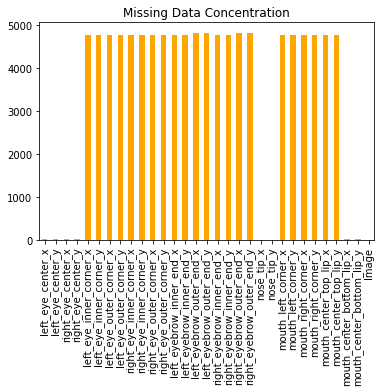

In [0]:
display(train_data.isnull().sum())
train_data.isnull().sum().plot(kind='bar',color = 'orange')
plt.title("Missing Data Concentration")
plt.show()

**Finding the Correaltion between different features using heatmaps from Seaborn**

In [0]:
train_data.fillna(method = 'ffill',inplace = True)

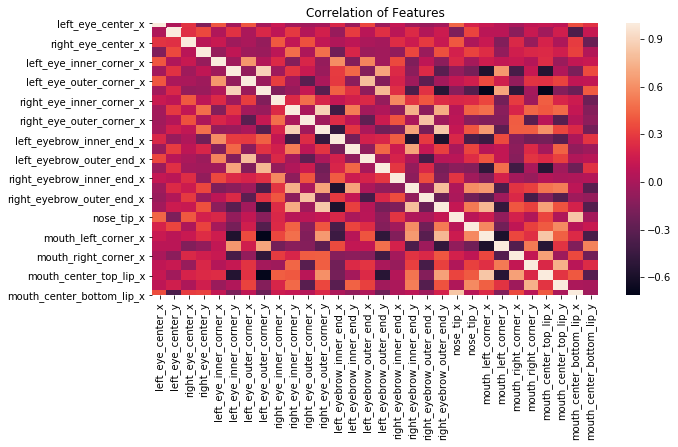

In [0]:
plt.figure(figsize =(10,5))
sns.heatmap(train_data.corr())
plt.title("Correlation of Features")
plt.show()

#### Visualizing the input Image and their Facial Keypoints

Now taking a look at the input images and how we can plot the images form their pixel values

**Visualizing the input image**

In [0]:
img_dt = []

for i in range(len(train_data)):
  img_dt.append(train_data['Image'][i].split(' '))
  
X = np.array(img_dt, dtype='float')
X_train1 = X # CREATING A BASE COPY JUST FOR VISUALIZATION 

In [0]:
foto = X_train1[0]

In [0]:
type(foto)

numpy.ndarray

In [0]:
foto.reshape(96,96)

array([[238., 236., 237., ..., 250., 250., 250.],
       [235., 238., 236., ..., 249., 250., 251.],
       [237., 236., 237., ..., 251., 251., 250.],
       ...,
       [186., 183., 181., ...,  52.,  57.,  60.],
       [189., 188., 207., ...,  61.,  69.,  78.],
       [191., 184., 184., ...,  70.,  75.,  90.]])

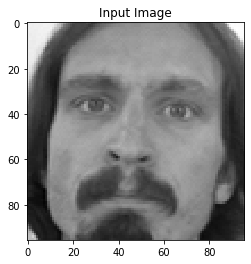

In [0]:
plt.imshow(X_train1[0].reshape(96,96), cmap='gray')
plt.title("Input Image")
plt.show()

#### Plotting the Facial Keypoints

Plotting the keypoints on the input images.

In [0]:
facial_pts_data = train_data.drop(['Image'], axis=1)
facial_pts = []

for i in range(len(facial_pts_data)):
  facial_pts.append(facial_pts_data.iloc[i])
  
y = np.array(facial_pts, dtype='float')
t = facial_pts_data.iloc[0].values

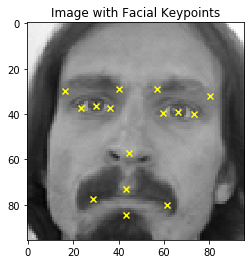

In [0]:
plt.imshow(X_train1[0].reshape(96,96), cmap='gray')
plt.scatter(t[0::2], t[1::2], c='yellow', marker='x')
plt.title("Image with Facial Keypoints")
plt.show()

#### Generating Heatmaps for the Keypoints
Plotting the heatmaps for our keypoints

**1) Heat Map Function**

In [0]:
def gaussian(xL, yL, H, W, sigma=5):

    channel = [math.exp(-((c - xL) ** 2 + (r - yL) ** 2) / (2 * sigma ** 2)) for r in range(H) for c in range(W)]
    channel = np.array(channel, dtype=np.float32)
    channel = np.reshape(channel, newshape=(H, W))

    return channel

**2) Plotting the all the plots**

(15, 96, 96)

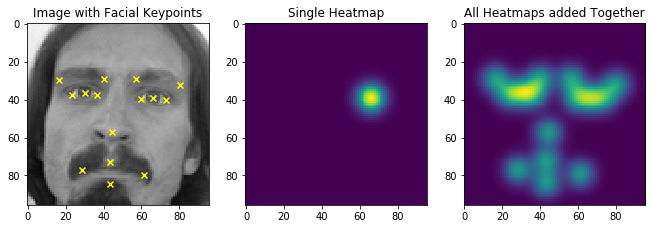

In [0]:
#Generate heatmaps for one sample image
heatmaps = []

for i in range(0, 30, 2):
    x = int(y[0][i])
    Y = int(y[0][i + 1])
    heatmap = gaussian(x, Y, 96, 96)
    heatmaps.append(heatmap)
    
heatmaps = np.array(heatmaps)

plt.figure(figsize=(15,15))

plt.subplot(1,4,1)
plt.imshow(X_train1[0].reshape(96,96), cmap='gray')
plt.scatter(t[0::2], t[1::2], c='yellow', marker='x')
plt.title("Image with Facial Keypoints")

plt.subplot(1,4,2)
plt.imshow(heatmaps[0])
plt.title("Single Heatmap")

plt.subplot(1,4,3)
plt.imshow(heatmaps.sum(axis=0))
plt.title("All Heatmaps added Together")


heatmaps.shape

### Part 2 - Building a Prediction model using Deep Learning (CNN)  

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
from PIL import Image

Now we are going to create different classes corresponding to different networks, we are going to work with a random CNN and LeNet

**Convolutional Neural Network (4 layers)**




In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # SEE THE FORWARD FUNCTION COMMENTS TO SEE WHERE THE DIMENSIONS OF THE IMAGE COME FROM
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5) # (b,1,96,96) to (b,4,92,92)
        self.conv1_bn = nn.BatchNorm2d(4)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=64, kernel_size=3) # (b,4,46,46) to (b,64,44,44)
        self.conv2_bn = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3) # (b,64,22,22) to (b,128,20,20)
        self.conv3_bn = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3) # (b,128,10,10) to (b,256,8,8)
        self.conv4_bn = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(256*4*4, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 30)
        self.dp1 = nn.Dropout(p=0.4)
    
        
    
    def forward(self, x, verbose=False):
        # 1 CONVOLUTIONAL LAYER
        # Input size: 96x96
        # (Hinput_size - Hkernel_size + 1 = Outputsize)
        # Output size = 96-5+1 = 92 
        # Max Pool from 1 Layer
        # Output after Max Pooling window (2,2): (92-2+2)/2 = 46
        x = self.conv1_bn(self.conv1(x))
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.dp1(x)
        
        # 2 CONVOLUTIONAL LAYER
        # Input size: 46x46
        # (Hinput_size - Hkernel_size + 1 = Outputsize)
        # Output size = 46-3+1 = 44 
        # Max Pool from 2 Layer
        # Output after Max Pooling window (2,2): (44-2+2)/2 = 22
        x = self.conv2_bn(self.conv2(x))
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.dp1(x)
        
        # 3 CONVOLUTIONAL LAYER
        # Input size: 22x22
        # (Hinput_size - Hkernel_size + 1 = Outputsize)
        # Output size = 22-3+1 = 20
        # Max Pool from 3 Layer
        # Output after Max Pooling window (2,2): (20-2+2)/2 = 10
        x = self.conv3_bn(self.conv3(x))
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.dp1(x)
        
        # 4 CONVOLUTIONAL LAYER
        # Input size: 10x10
        # (Hinput_size - Hkernel_size + 1 = Outputsize)
        # Output size = 10-3+1 = 8
        # Max Pool from 4 Layer
        # Output after Max Pooling window (2,2): (8-2+2)/2 = 4
        x = self.conv4_bn(self.conv4(x))
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.dp1(x)
        
        # END OF THE CONVOLTUTION STAGE
        # 256 outputs of size 4x4
        x = x.view(-1, 256*4*4)
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dp1(x)
        x = self.fc3(x)
        return x

**LeNet5**

In [0]:
class LeNet5(nn.Module): 
    
    def __init__(self):
        super(LeNet5, self).__init__()
        # Convolution Block
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        # 6 input image channels, 16 output channels, 5x5 square convolution kernel
        self.conv2 = nn.Conv2d(6, 16, 5)

        # Fully connected Block
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 21 * 21, 120)  # 21*21 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 30)

    def forward(self, x):
        
        # The image size of our dataset is 96x96, then
        # Input size: 96x96   
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        # Output from layer conv1: 6 layers of 96x96 size (96-5+1 = 92)
        # Output after Max Pooling window (2,2): (92-2+2)/2 = 46
        x = F.max_pool2d(torch.sigmoid(self.conv1(x)), 2, 2) 
        
        # Input size for the next layer: 46x46
        # 6 input image channel, 16 output channels, 5x5 square convolution kernel
        # Output from layer conv1: 16 layers of 46x46 size (46-5+1 = 42)
        # Output after Max Pooling window (2,2): (42-2+2)/2 = 21
        x = F.max_pool2d(torch.sigmoid(self.conv2(x)), 2, 2) 
        
        # Input size for the fully connected stage: 16 layers of 21x21 size
        x = x.view(-1, self.num_flat_features(x))
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def testing(model, device, valid_loader):
  # we have to tell the model that we are on evaluation mode
  model.eval()
  test_loss = 0
  for data, target in valid_loader:
    data, target = data.to(device), target.to(device)
    # Arrange the data dimensions to feed the model
    data = data.view(-1, 96*96)
    data = data.view(-1, 1, 96, 96)
    # Prediction of coordinates for test data
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()
    
  test_loss /= len(valid_loader.dataset)
  return test_loss

def training(epochs, model, criterion, device, train_loader, valid_loader, optimizer):
  train_error_list = []
  val_error_list = []
  for epoch in range(epochs):
    # We have to tell the model that we are on trainnig mode (not all the parameters are the same in evaluation and training mode)
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
      data, target = data.to(device), target.to(device)
      # Arrange the data dimensions to feed the model
      data = data.view(-1, 96*96)
      data = data.view(-1, 1, 96, 96)

      optimizer.zero_grad()
      output = model(data)
      loss = criterion(output, target)
      train_loss += loss.item()
      loss.backward()
      optimizer.step()
    
    train_loss /= len(train_loader.dataset)
    # Send the validation data to testing data to evaluate how good is doing the model
    eval_loss = testing(model, device, valid_loader)
    train_error_list.append(train_loss)
    val_error_list.append(eval_loss)
    if (epoch+1) % 10 == 0:
      print("End of epoch {}: \nTraining error = [{}]\tValidation error = [{}]".format(epoch+1, train_loss, eval_loss))
  return train_error_list, val_error_list

In [0]:
def train_test_split(X, validation_split):
  dataset_size = len(X)
  indices = list(range(dataset_size))
  val_num = int(np.floor(validation_split*dataset_size))
  np.random.shuffle(indices)
  # Split the indexes
  train_indices, val_indices = indices[val_num:], indices[:val_num]

  train_sampler = data_utils.SubsetRandomSampler(train_indices)
  valid_sampler = data_utils.SubsetRandomSampler(val_indices)

  loader_object = data_utils.TensorDataset(torch.from_numpy(X).float(), torch.from_numpy(y).float())
  train_loader = data_utils.DataLoader(loader_object, batch_size=32, sampler=train_sampler)
  valid_loader = data_utils.DataLoader(loader_object, batch_size=32, sampler=valid_sampler)
  return train_loader, valid_loader

In [0]:
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

n_hidden = 128 # number of hidden units
output_size = 30

# We are creating a validation data to check on the evolution of out model, change 0.2 
# for changing the proportion of validation data used
train_loader, valid_loader = train_test_split(X, 0.2)


# Depending which model we want to use we need to specify on this line whether we want to use CNN or LeNet5
model = CNN()
model.to(device)
criterion = torch.nn.MSELoss() 
optimizer = optim.Adam(model.parameters())

print('Number of parameters: {}'.format(get_n_params(model)))

train_error_list, valid_error_list = training(500, model, criterion, device, train_loader, valid_loader, optimizer)

Number of parameters: 4837838
End of epoch 10: 
Training error = [1.1122167711478461]	Validation error = [0.13677143113700055]
End of epoch 20: 
Training error = [1.020171964095829]	Validation error = [0.544887139554023]
End of epoch 30: 
Training error = [1.1203888219237277]	Validation error = [0.3363392245838838]
End of epoch 40: 
Training error = [0.984142939069285]	Validation error = [0.1976470652328753]
End of epoch 50: 
Training error = [0.9102798829367523]	Validation error = [0.11221277231797375]
End of epoch 60: 
Training error = [0.9146679718454842]	Validation error = [0.2251805616517594]
End of epoch 70: 
Training error = [0.9147187553748862]	Validation error = [0.11232601332992573]
End of epoch 80: 
Training error = [0.8975648656772847]	Validation error = [0.08447184375303488]
End of epoch 90: 
Training error = [0.8693981270770482]	Validation error = [0.09550067146951755]
End of epoch 100: 
Training error = [0.8290808108499294]	Validation error = [0.1643052376454765]
End of 

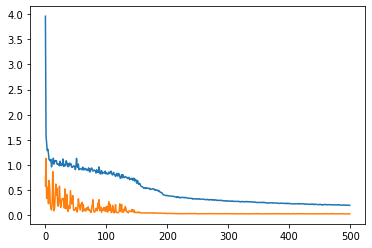

In [0]:
plt.plot(train_error_list)
plt.plot(valid_error_list)


### Visualizing The Outputs

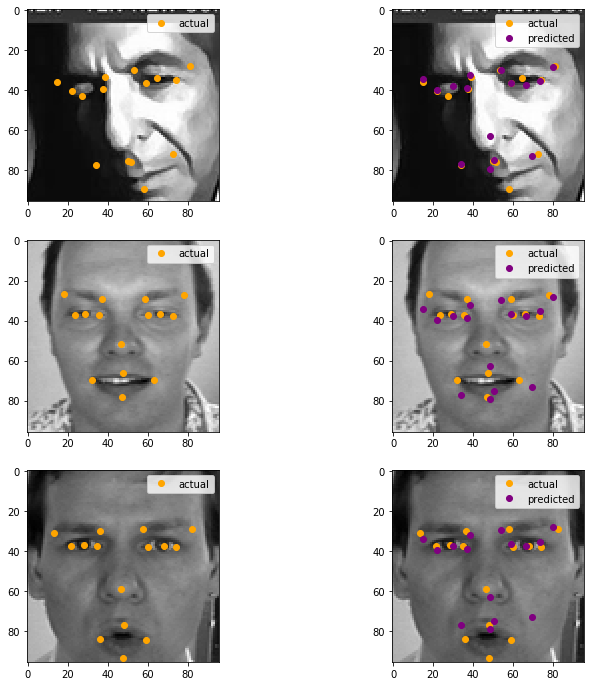

In [0]:
def plot_samples(X, y, model, num_samples):
  fig, axes = plt.subplots(nrows=num_samples, ncols=2, figsize=(12,12))
  
  for row in range(num_samples):
    # get random indexes to dispaly the results on the images
    sample_idx = np.random.choice(len(X))
    x = X[sample_idx]
    x = torch.from_numpy(x).float().view(1,1,96,96).to(device)
    actual_y = y[sample_idx]
    pred_y = model(x)
    img = X[sample_idx].reshape(96,96)
    
    # Set the coordinates data so we can plot them along the original image
    actual_y = np.vstack(np.split(actual_y, 15)).T
    pred_y = pred_y.cpu().data.numpy()[0]
    pred_y = np.vstack(np.split(pred_y, 15)).T
    
    # Representation
    axes[row, 0].imshow(img, cmap='gray')
    axes[row, 0].plot(actual_y[0], actual_y[1], 'o', color='orange', label='actual')
    axes[row, 0].legend()
    axes[row, 1].imshow(img, cmap='gray')
    axes[row, 1].plot(actual_y[0], actual_y[1], 'o', color='orange', label='actual')
    axes[row, 1].plot(pred_y[0], pred_y[1], 'o', color='purple', label='predicted')
    axes[row, 1].legend()

 # change three for another number to see display the results in more than three pictures 
plot_samples(X, y, model, 3)

## Reading the Test Dataset

In [0]:
img_dt = []

for i in range(len(test_data)):
  img_dt.append(test_data['Image'][i].split(' '))
  
test_X = np.array(img_dt, dtype='float')


## Prediction on test set:

In [0]:
# Prepare the data to feed it into the model, numpy to torch plus the size (4dimensions)
test_X_torch = torch.from_numpy(test_X).float().view(len(test_X),1,96,96).to(device)
# Obtaining the coordinates
test_predictions = model(test_X_torch)
test_predictions = test_predictions.cpu().data.numpy()
# lists of coordinates
keypts_labels = train_data.columns.tolist()

In [0]:
test_X_torch.shape

torch.Size([1783, 1, 96, 96])

Visualizing the test predictions

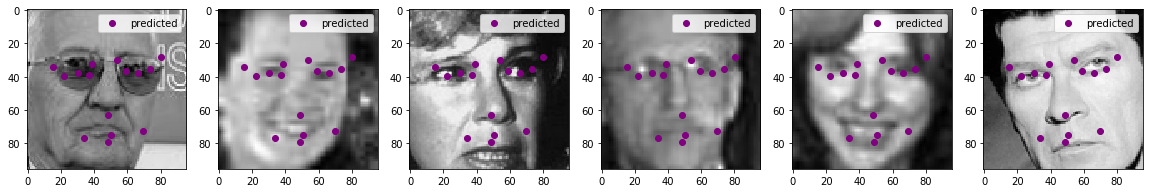

In [0]:
def plot_samples_test(X, y, num_samples):
  fig, axes = plt.subplots(nrows=1, ncols=num_samples, figsize=(20,12))
  
  for row in range(num_samples):
    sample_idx = np.random.choice(len(X))
    img = X[sample_idx].reshape(96,96)
    predicted = y[sample_idx]
    
    predicted = np.vstack(np.split(predicted, 15)).T
    axes[row].imshow(img, cmap='gray')
    axes[row].plot(predicted[0], predicted[1], 'o', color='Purple', label='predicted')
    axes[row].legend()
  
plot_samples_test(test_X, test_predictions, 6)

Part 3 - Applying model to random images 

In this section we are getting an image from the internet (in this case a football team) where the people's faces are clear and easy to indentify

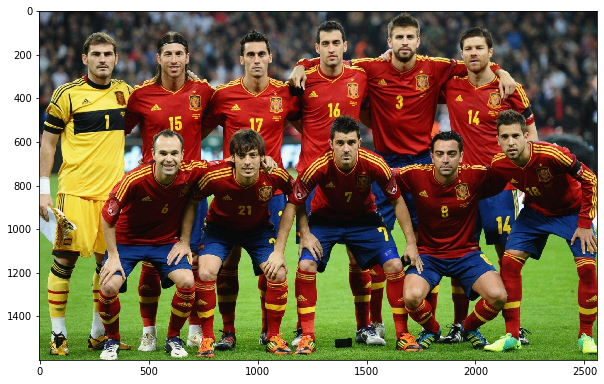

In [0]:
# Displaying the photo we are going to deal with
import cv2
plt.figure(figsize =(10,50))
image = cv2.imread('original.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

The issue now is that the size of this image is way bigger than the size of our model can handle. Our model expects image of size 96x96. 
So, How to fix this problem? 
We will use the Open Source Computer Vision library to detect the faces in the image that we uploaded and then extract from the original one as many imaes as faces the OpenCV function found. Then we will feed our model with these images with the faces from the original, and we will get the coordinates for the facial keypoints of the faces in the image uploaded

In [0]:
# Uploading the dataset for detecting the frontal face
from google.colab import files
files.upload()

In [0]:
!ls

'AbccEAc (1).jpg'			   'kaggle (3).json'
'AbccEAc (2).jpg'			    kaggle.json
 AbccEAc.jpg				    original.jpg
'haarcascade_frontalface_default (1).xml'  'P1030450 (1).JPG'
'haarcascade_frontalface_default (2).xml'   P1030450.JPG
'haarcascade_frontalface_default (3).xml'   sample_data
 haarcascade_frontalface_default.xml	    SampleSubmission.csv
 IdLookupTable.csv			    test.zip
'kaggle (1).json'			    training.zip
'kaggle (2).json'


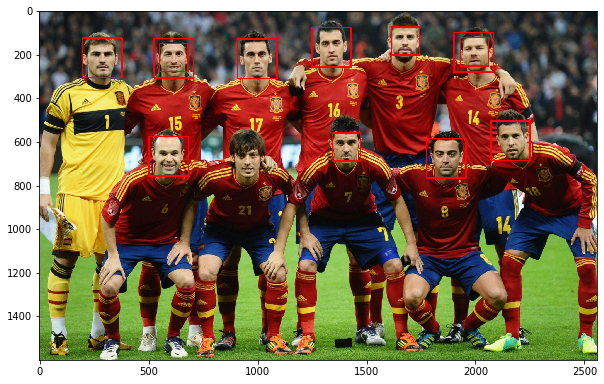

In [0]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(image, scaleFactor=1.4, minNeighbors=6)
image_with_detections = image.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),6) 
plt.figure(figsize =(10,50))
plt.imshow(image_with_detections)

In [0]:
class FaceDetection():
    
    def __init__(self, path2img = 'AbccEAc.jpg', path2class = 'haarcascade_frontalface_default.xml'):
        
        #Load image
        self.img_original = cv2.imread(path2img)
        
        # Convert to RGB colorspace
        self.img_original = self.convertToRGB(self.img_original)
        
        # copy original image
        self.img_with_detections = np.copy(self.img_original)
        
        #convert image to gray (opencv expects gray images)
        self.gray_img = self.convertToGray(self.img_original)

        #load cascade classifier (haarcascade) training file
        self.haar_face_cascade = cv2.CascadeClassifier(path2class)

        #Detect multiscale images 
        self.faces = self.haar_face_cascade.detectMultiScale(self.gray_img, scaleFactor=1.1, minNeighbors=5);

    def number_faces(self):
        #print the number of faces found 
        print('Faces found: ', len(self.faces))

    def convertToGray(self, img):
        # Convert the RGB  image to grayscale
        return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    def convertToRGB(self, img):
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    
    def detection(self):
    
        faces_crop = []
        for (x, y, w, h) in self.faces:  
            obj = self.img_original[y:y + h, x:x + w]
            faces_crop.append(obj)
            cv2.rectangle(self.img_with_detections, (x, y), (x+w, y+h), (0, 255, 0), 2)
            
        return faces_crop


In [0]:
FaceDetection = FaceDetection()

In [0]:
# Number of faces detected on the photo that we uploaded
FaceDetection.number_faces()

Faces found:  15


In [0]:
# On faces_crop we are going to storage the values of the image pixels for each of the faces detected on the original photo
faces_crop = FaceDetection.detection()
(img_original, img_with_detections) =  (FaceDetection.img_original, FaceDetection.img_with_detections)


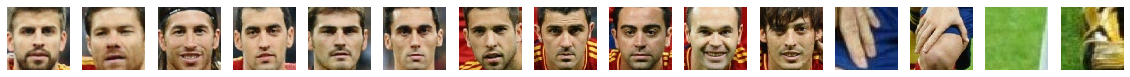

In [0]:
# Plotting every single face that the OpenCV function found
plt.figure(figsize=(20,5))
count = 1
faces_crop[0:5]
for face in faces_crop:
    plt.subplot(1,len(faces_crop),count)
    count+=1
    plt.imshow(face)
    plt.axis('off')


In [0]:
def faces_oneChannel_96(faces_crop):
  count=1
  plt.figure(figsize=(50,40))
  for face in faces_crop:
    # must be type = numpy.ndarray
    type(face)
    # We get one channel out of the three channels of the picture
    face = face[:,:,1]
    # we transform it to PIL file so we we can resize it in order to feed it to our model, it only accepts pics of size 96x96
    face = Image.fromarray(face)
    face_96 = face.resize((96,96),Image.ANTIALIAS)

    # then we convert it back to numpy to manipulate it 
    test_face = np.array(face_96)

    # We convert it to torch domain so we can use it in our model
    test_face_torch = torch.from_numpy(test_face).float().to(device)
    test_face = test_face_torch.reshape(1,1,96,96) 

    # Using the model to predict the coordinates in the face we are dealing in this iteration
    test_predictions_plantilla = model(test_face)
    test_predictions_plantilla = test_predictions_plantilla.cpu().data.numpy()

    # This is the list with the face keypoints we are detecting
    #keypts_labels_plantilla = train_data.columns.tolist() 

    # We pair the coordinates and pile then in columns for coord x and coord y
    coord = np.vstack(np.split(test_predictions_plantilla[0],15))
    coord


    plt.subplot(1,len(faces_crop),count)
    count+=1
    plt.imshow(face_96)
    plt.plot(coord[:,0], coord[:,1], 'o', color='White', label='predicted')
    plt.axis('off')


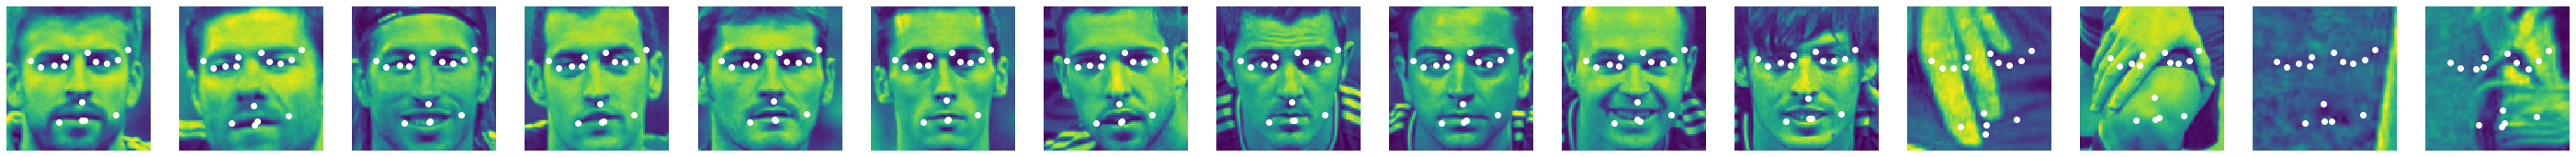

In [0]:
faces_oneChannel_96(faces_crop)